In [168]:
#Import packages
import os
import flopy
import numpy as np
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
import geopandas as gpd
from scipy.stats import norm

In [169]:
## Set up directory referencing
# Package data
git_dir = os.path.dirname(os.path.dirname(os.getcwd()))
gwfm_dir = '\\'.join(str.split(git_dir,'\\')[0:3])+ '/Box/research_cosumnes/GWFlowModel'
print(git_dir, gwfm_dir)

C:\Users\arodri44\Documents\GitHub\CosumnesRiverRecharge C:\Users\arodri44/Box/research_cosumnes/GWFlowModel


In [170]:
loadpth = 'C:/wrdapp/GWFlowModel/Cosumnes/Cosumnes_simple'
model_ws = loadpth+'/WEL_RIV_RCH_tprogs_200layers/realization000'
m = flopy.modflow.Modflow.load('MF.nam', model_ws=model_ws, 
                                exe_name='MF2005', version='mf2005')

In [171]:
def plot_lines(lines):
    fig, ax = plt.subplots()
    for ln in lines:
        plt.plot([ln[0][0], ln[1][0]], [ln[0][1], ln[1][1]], linewidth = 0.1)

In [188]:
##Grid Creation for Large Model
# Load model grid as geopandas object
grid_regional = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')
# grid_p = gpd.read_file(gwfm_dir+'/DIS_data/44_7_grid/44_7_grid.shp')
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/Inset_grid_44_7/44_7_grid.shp')

grid_p_temp = grid_p.copy()
grid_p_temp.geometry = grid_p_temp.buffer(-99.9999)
# grid_regional.geometry = grid_regional.buffer(-100)

grid_ref = gpd.sjoin(grid_p_temp, grid_regional.to_crs('epsg:3310'), how = 'left',predicate = 'within',
                     lsuffix='inset', rsuffix = 'regional')
# grid_ref = pd.DataFrame(grid_ref.loc[:,['row_inset','column_inset','row_regional','column_regional']])
# reset geometry from tiny polygon to rectangle
grid_ref.geometry = grid_p.geometry

grid_ref = grid_ref.rename({'row_inset':'row','column_inset':'column'},axis=1)

In [189]:
##Teichert Model Load
Teichert = gpd.read_file('C:/wrdapp/OHWD recharge project files/Kautz Property.shp')
Teichert_3310 = Teichert.to_crs('epsg:3310')

In [196]:
for n in np.arange(0,100).astype(str):
    model = 'C:/wrdapp/GWFlowModel/Cosumnes/Cosumnes_simple/WEL_RIV_RCH_tprogs_200layers/realization'+ n.zfill(3)+'/'
    hdobj = flopy.utils.HeadFile(model + '/MF.hds')
    head = hdobj.get_data(kstpkper = spd_stp[0])
    head.shape
    A = head[100,:,:]
    A_new = np.reshape(A,(6300,1))
    grid_ref["Head"+n] = A_new


In [197]:
spd_stp[0]

(0, 0)

In [191]:
##Clip Data
#grid_ref = gpd.sjoin(grid_p_temp, grid_regional.to_crs('epsg:3310'), how = 'left',predicate = 'within',
                     #lsuffix='inset', rsuffix = 'regional')
grid_teichert = gpd.sjoin(grid_ref, Teichert_3310)
#grid_teichert.plot()
grid_teichert

,node_inset,row,column,geometry,index_regional,node_regional,row_regional,column_regional,Head0,Head1,...,Head94,Head95,Head96,Head97,Head98,Head99,index_right,Id,Name,Area
3181,3182,31,32,"POLYGON ((-109266.675 48215.070, -109124.515 4...",9566,9567,42,137,22.510250,23.346539,...,23.523392,23.044891,23.083487,22.971506,22.684050,23.642580,0,0,Kautz Property,785
3182,3183,31,33,"POLYGON ((-109124.515 48355.749, -108982.355 4...",9567,9568,42,138,22.704483,23.496458,...,23.678923,23.208170,23.297506,23.158827,22.934019,23.792574,0,0,Kautz Property,785
3183,3184,31,34,"POLYGON ((-108982.355 48496.428, -108840.195 4...",9568,9569,42,139,22.908302,23.649113,...,23.831419,23.374149,23.492128,23.342117,23.172403,23.938341,0,0,Kautz Property,785
3184,3185,31,35,"POLYGON ((-108840.195 48637.107, -108698.035 4...",9569,9570,42,140,23.127399,23.798515,...,23.984879,23.529034,23.688669,23.532951,23.380577,24.087999,0,0,Kautz Property,785
3185,3186,31,36,"POLYGON ((-108698.035 48777.786, -108555.876 4...",9570,9571,42,141,23.370230,23.944324,...,24.139160,23.685007,23.909803,23.729887,23.570198,24.250763,0,0,Kautz Property,785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,4030,39,40,"POLYGON ((-107003.964 48203.223, -106861.804 4...",11643,11644,51,144,23.406969,23.833580,...,23.945814,23.640877,23.817518,23.924021,24.378370,24.369719,0,0,Kautz Property,785
4030,4031,39,41,"POLYGON ((-106861.804 48343.902, -106719.645 4...",11644,11645,51,145,23.523697,23.948019,...,24.009031,23.753901,23.941250,24.051517,24.428839,24.540287,0,0,Kautz Property,785
4031,4032,39,42,"POLYGON ((-106719.645 48484.581, -106577.485 4...",11645,11646,51,146,23.662273,24.088602,...,24.131973,23.963812,24.090775,24.217016,24.479212,24.759039,0,0,Kautz Property,785
4032,4033,39,43,"POLYGON ((-106577.485 48625.260, -106435.325 4...",11646,11647,51,147,23.825174,24.218538,...,24.274193,24.308949,24.248997,24.417147,24.546486,25.038906,0,0,Kautz Property,785


<AxesSubplot:>

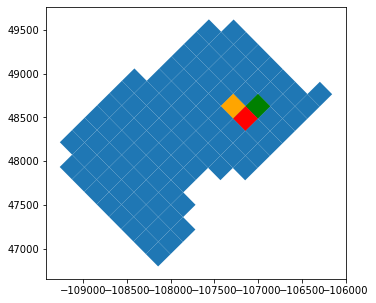

In [212]:
#grid_teichert.plot()
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
grid_teichert.plot(ax = ax)
B1 = grid_teichert.iloc[80:81,:]
B1.plot(ax = ax, color = 'green')
B2 = grid_teichert.iloc[79:80,:]
B2.plot(ax = ax, color = 'red')
B3 = grid_teichert.iloc[66:67,:]
B3.plot(ax = ax, color = 'orange')
#B4 = grid_teichert.iloc[95:96,:]
#B4.plot(ax = ax, color = 'yellow')
#B5 = grid_teichert.iloc[96:97,:]
#B5.plot(ax = ax, color = 'purple')

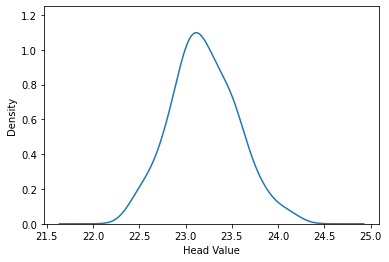

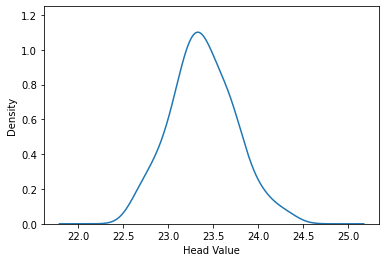

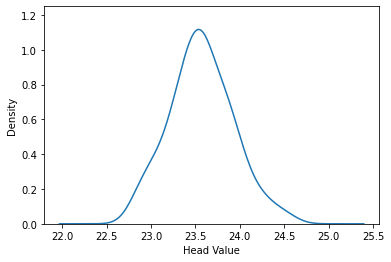

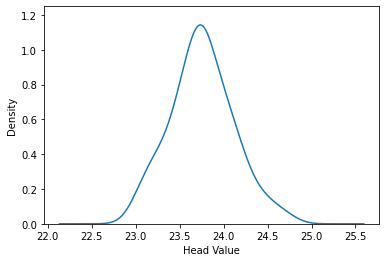

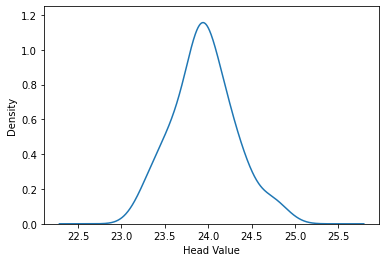

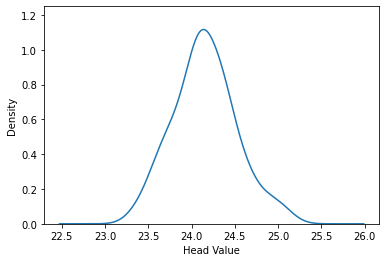

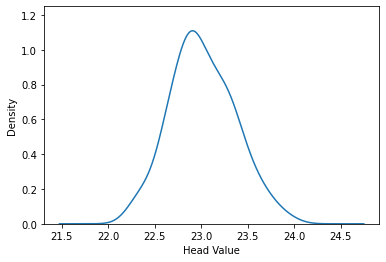

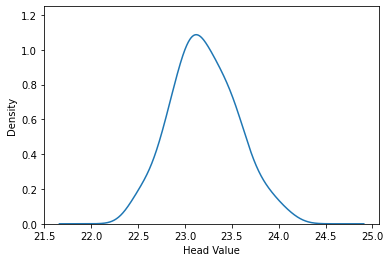

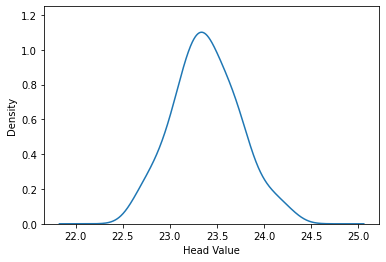

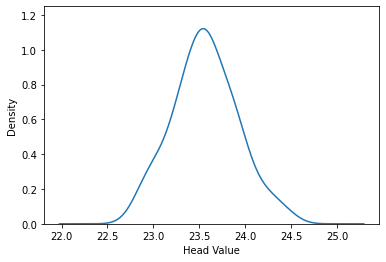

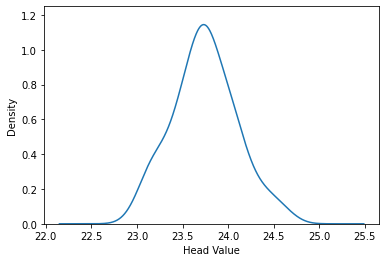

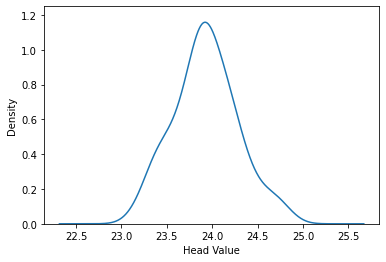

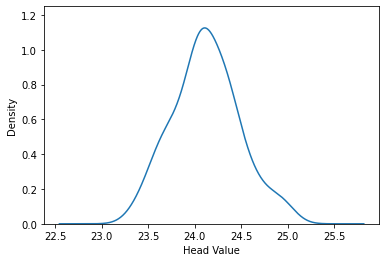

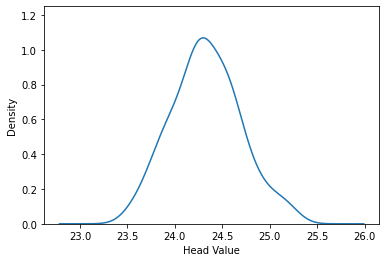

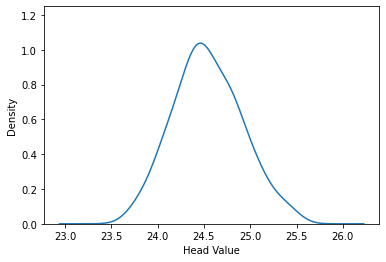

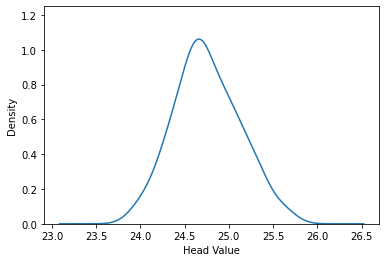

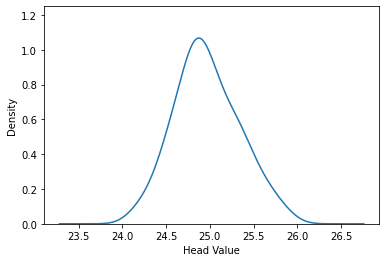

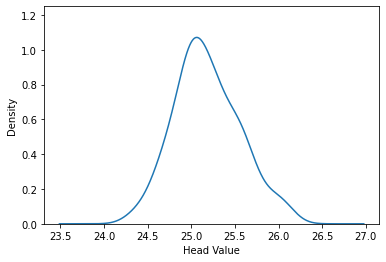

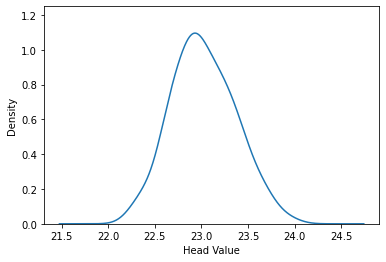

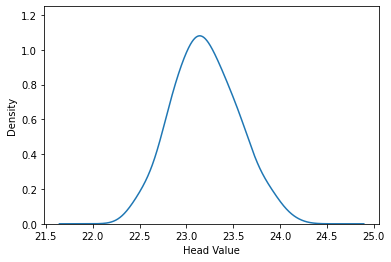

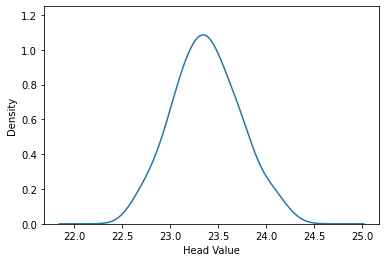

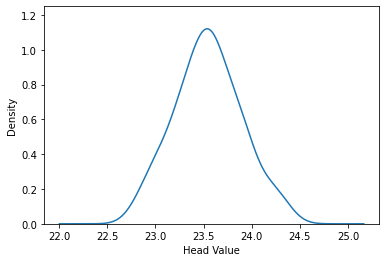

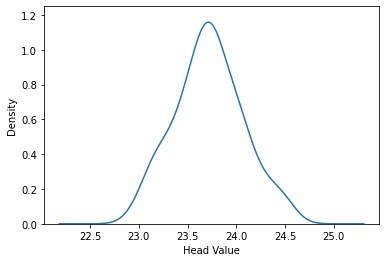

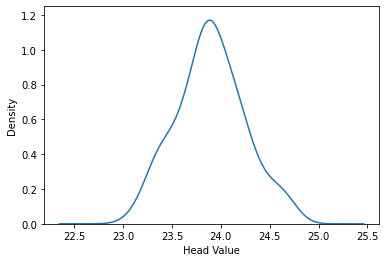

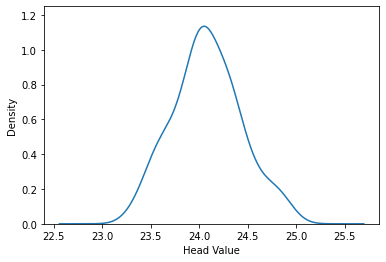

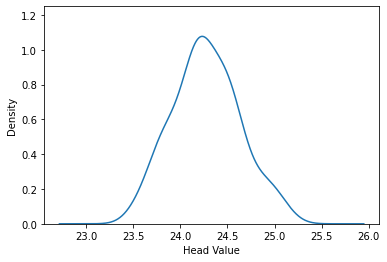

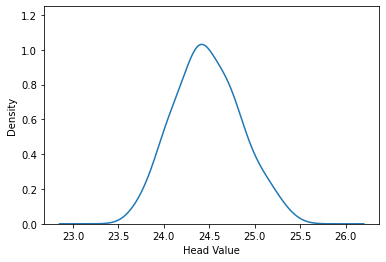

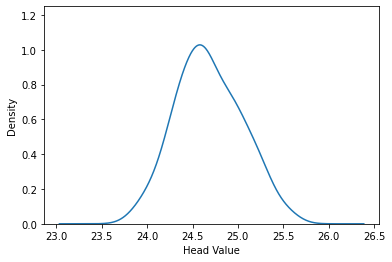

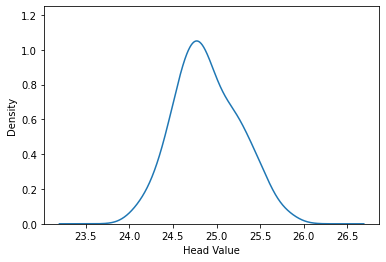

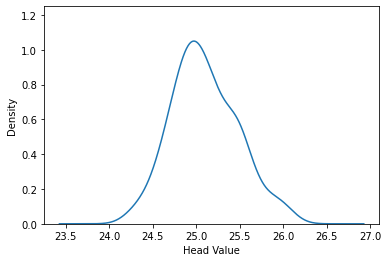

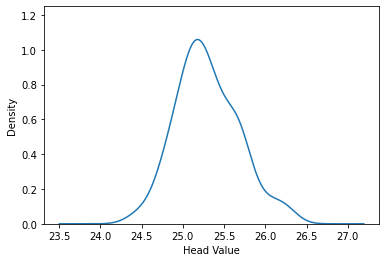

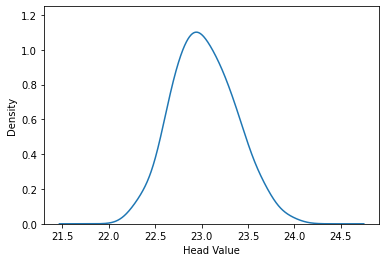

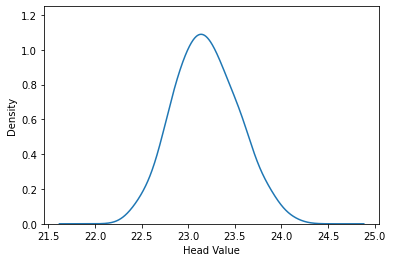

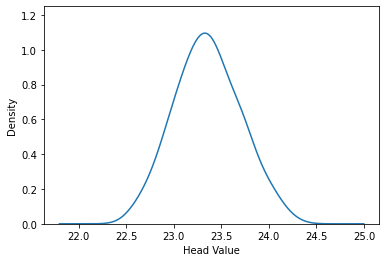

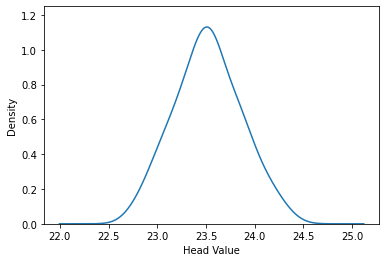

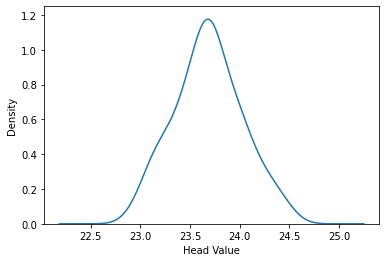

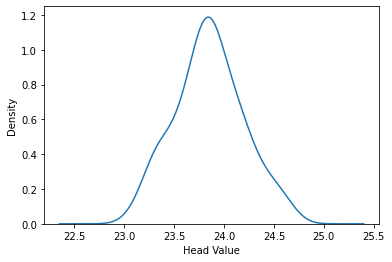

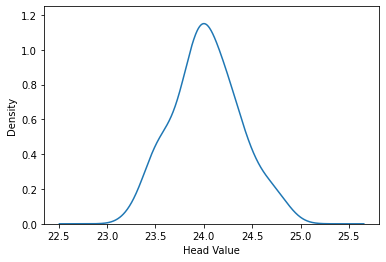

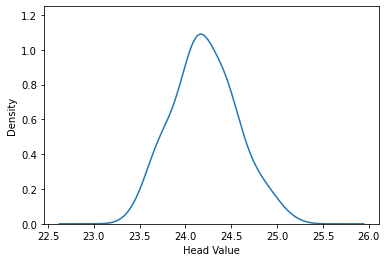

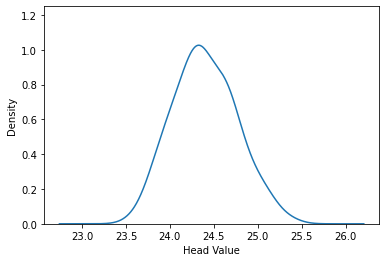

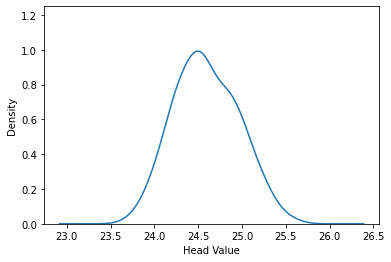

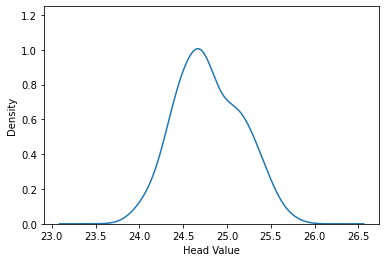

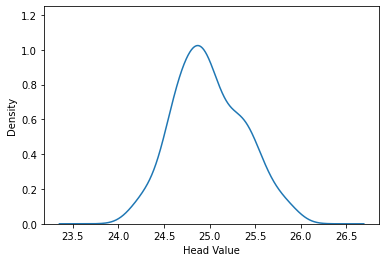

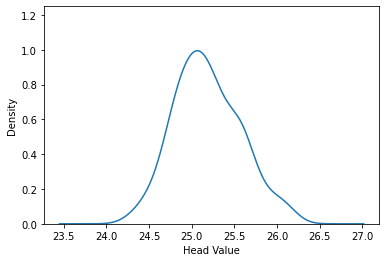

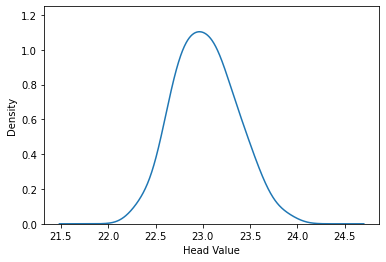

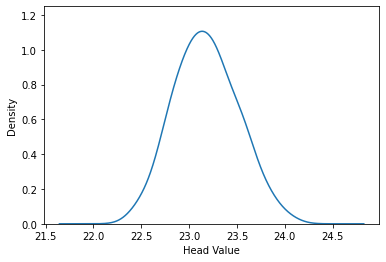

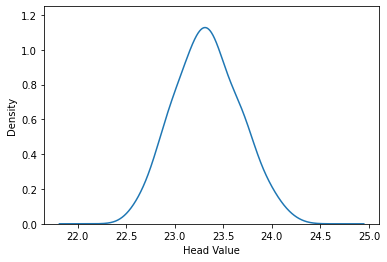

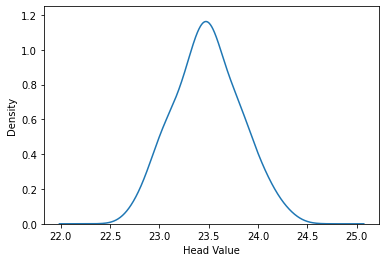

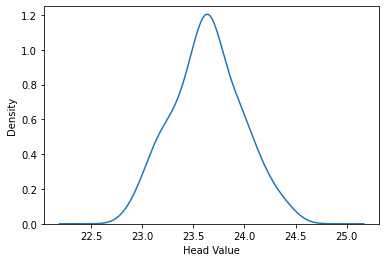

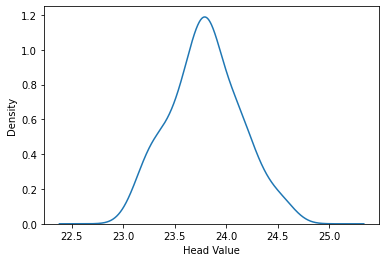

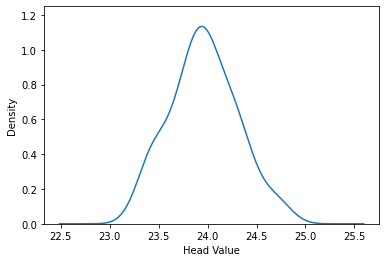

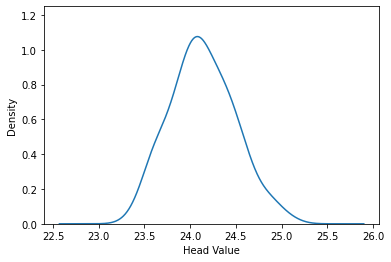

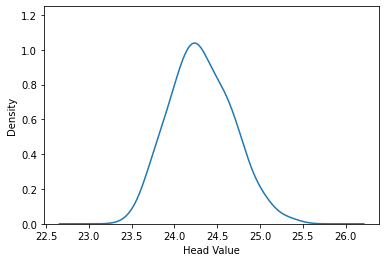

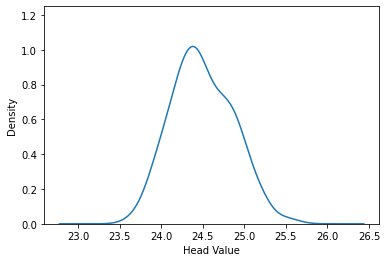

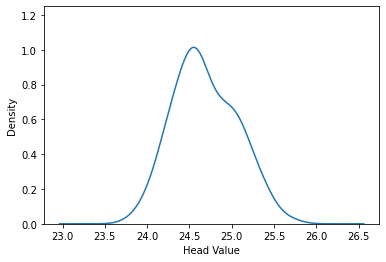

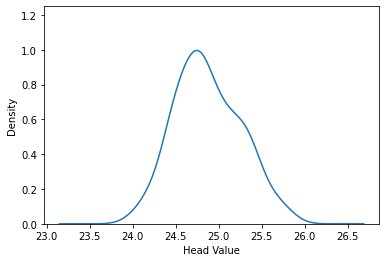

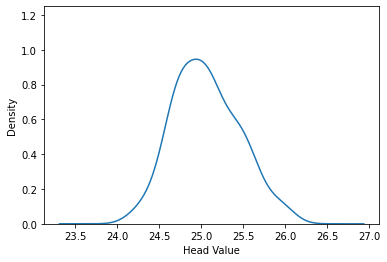

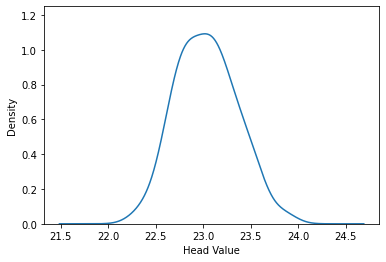

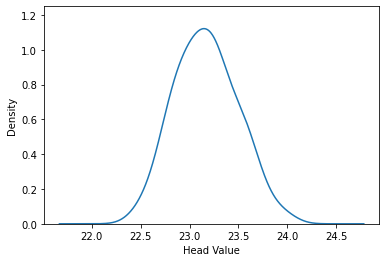

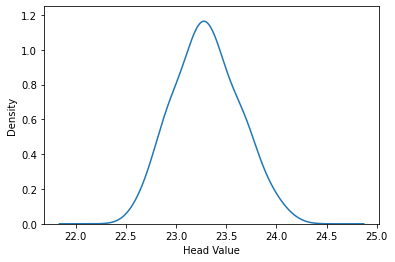

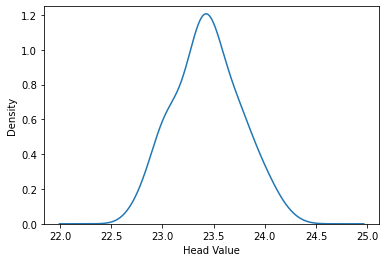

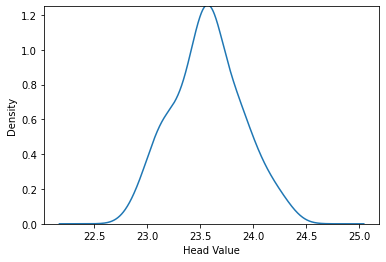

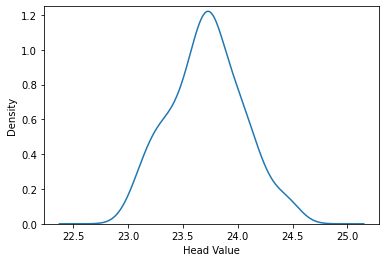

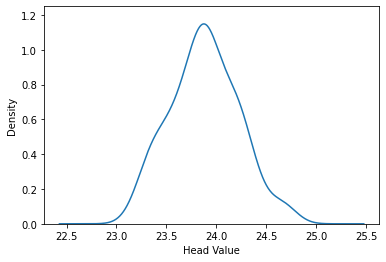

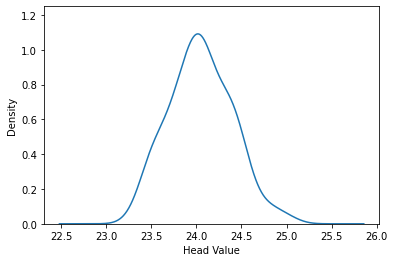

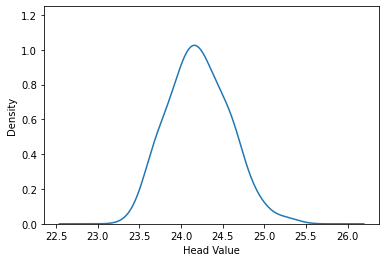

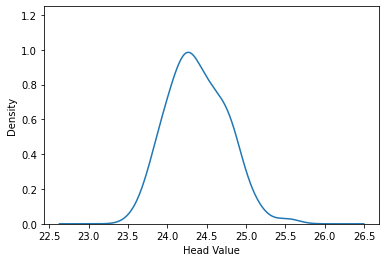

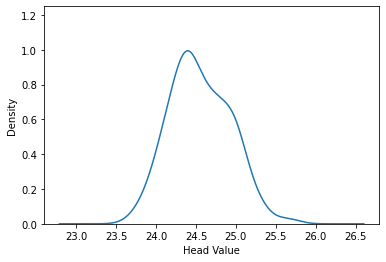

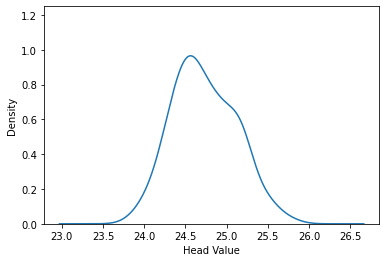

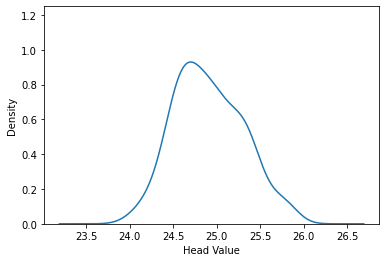

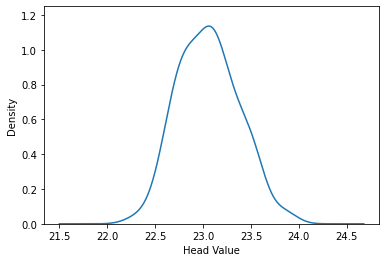

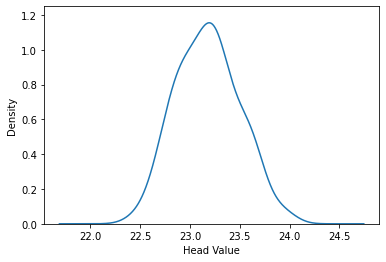

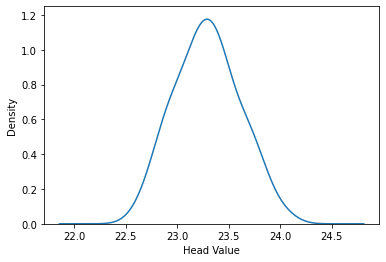

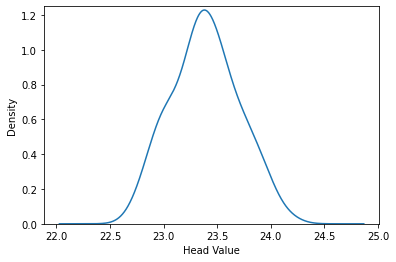

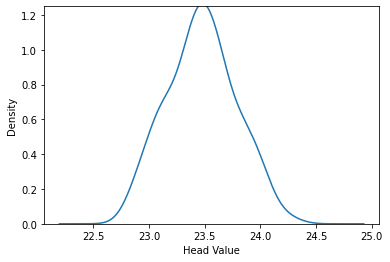

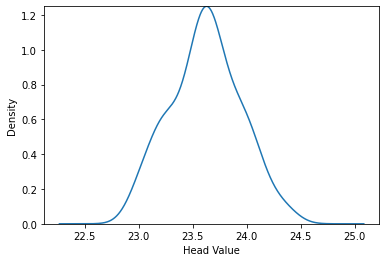

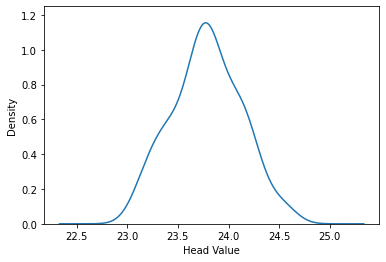

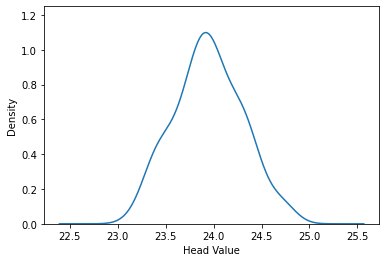

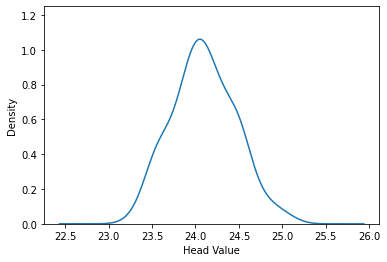

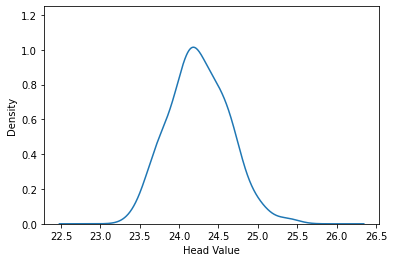

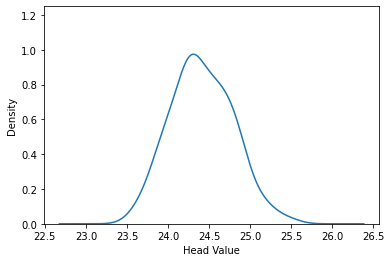

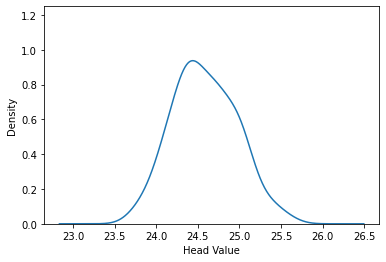

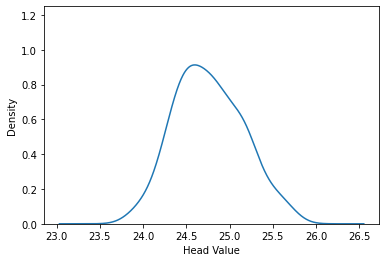

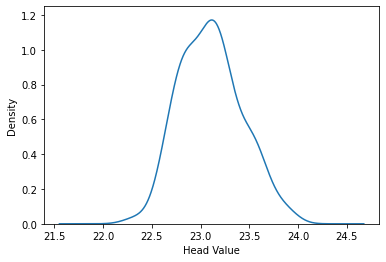

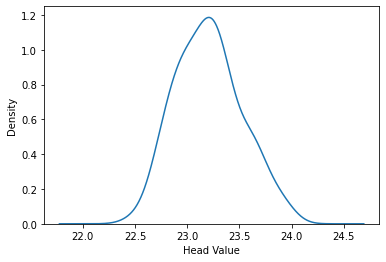

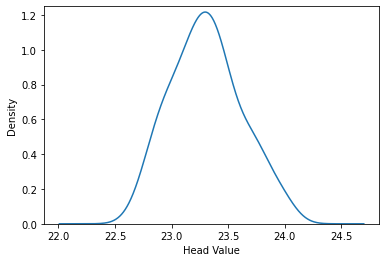

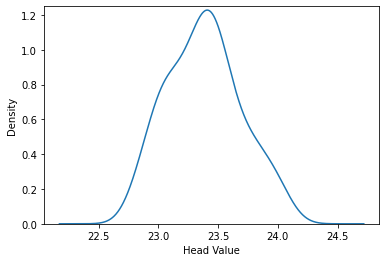

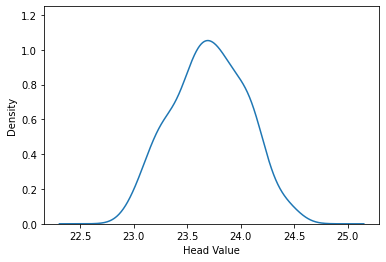

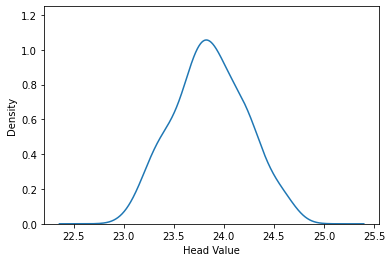

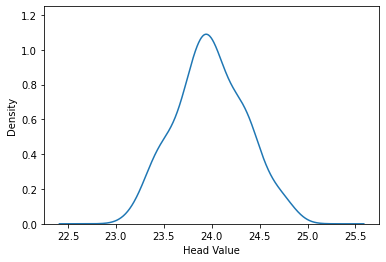

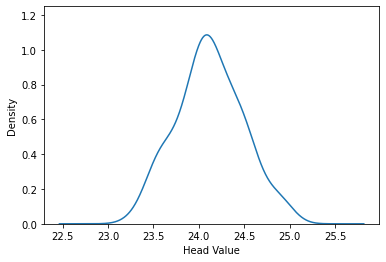

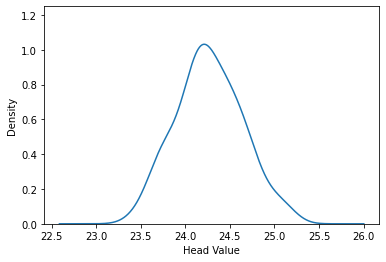

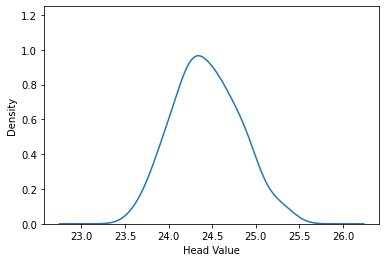

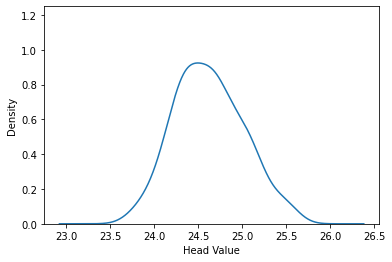

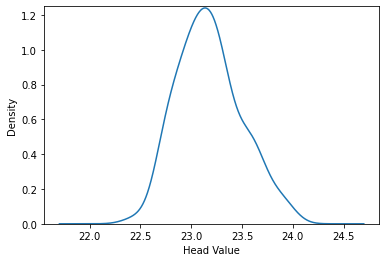

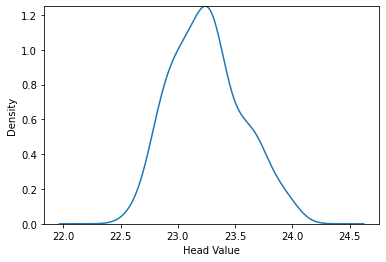

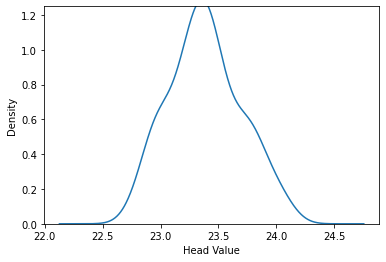

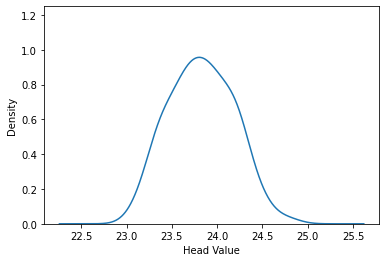

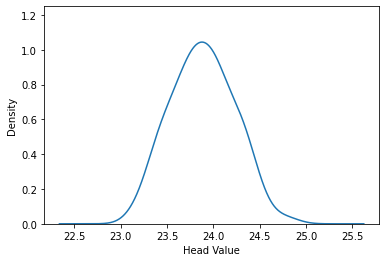

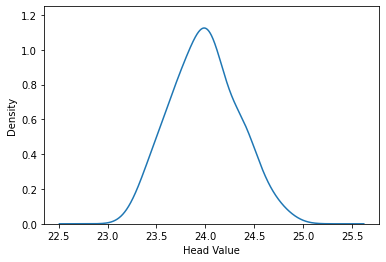

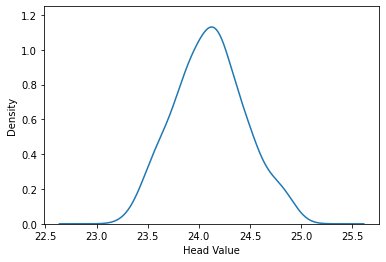

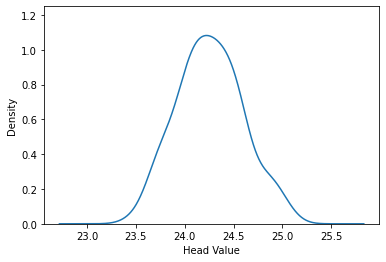

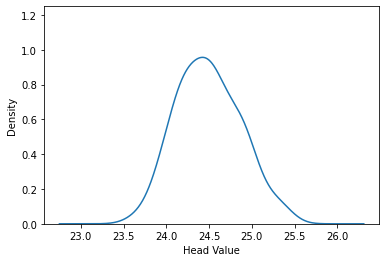

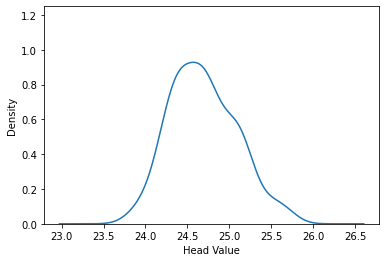

In [200]:
for r in np.arange(0,104):
    Plt = plt.figure(r)
    X = grid_teichert.iloc[r,8:108]    
    #norm.pdf(X)
    Plt = X.plot.kde()
    plt.ylim(0,1.25)
    plt.xlabel('Head Value')

NameError: name 'pvariance' is not defined

Text(0.5, 1.0, 'Teichert Highest Peaks')

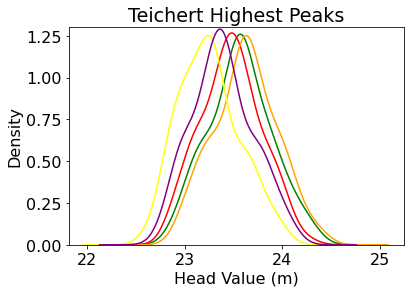

In [214]:
plt.rcParams.update({'font.size': 16})
Plt = plt.figure()
ax = Plt.add_subplot(1,1,1)
plt.ylim(0,1.3)
X = grid_teichert.iloc[61,8:108]
Plt = X.plot.kde(ax = ax, color = 'green')
X1 = grid_teichert.iloc[74,8:108]
Plt = X1.plot.kde(ax = ax, color = 'red')
X2 = grid_teichert.iloc[75,8:108]
Plt = X2.plot.kde(ax = ax, color = 'orange')
X3 = grid_teichert.iloc[95,8:108]
Plt = X3.plot.kde(ax = ax, color = 'yellow')
X4 = grid_teichert.iloc[96,8:108]
Plt = X4.plot.kde(ax = ax, color = 'purple')
    #Plt = PDF.plot()
    #AAA = find_peaks(PDF)
    #AAA
plt.xlabel('Head Value (m)')
plt.title('Teichert Highest Peaks')

Text(0.5, 1.0, 'Teichert Largest Spread')

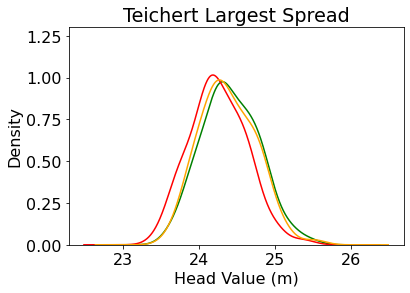

In [215]:
plt.rcParams.update({'font.size': 16})
Plt = plt.figure()
ax = Plt.add_subplot(1,1,1)
plt.ylim(0,1.3)
X = grid_teichert.iloc[80,8:108]
Plt = X.plot.kde(ax = ax, color = 'green')
X1 = grid_teichert.iloc[79,8:108]
Plt = X1.plot.kde(ax = ax, color = 'red')
X2 = grid_teichert.iloc[66,8:108]
Plt = X2.plot.kde(ax = ax, color ='orange')
#X3 = grid_teichert.iloc[95,8:108]
#Plt = X3.plot.kde(ax = ax)
#X4 = grid_teichert.iloc[96,8:108]
#Plt = X4.plot.kde(ax = ax)
    #Plt = PDF.plot()
    #AAA = find_peaks(PDF)
    #AAA
plt.xlabel('Head Value (m)')
plt.title('Teichert Largest Spread')

In [137]:
##Plot Head Data
def plot_head(hdobj, name):
    head = hdobj.get_data()
    levels_hmax = np.round(np.max(head[head!=1E+30]),-1)
#     levels_hmin = np.round(np.min(head[head!=-999.99]),-1)
    levels_hmin = np.round(np.min(head[head>=-200]),-1)
   # frf = cbb.get_data(text='FLOW RIGHT FACE')[0]
   # fff = cbb.get_data(text='FLOW FRONT FACE')[0]

    levels = np.arange(levels_hmin, levels_hmax, 2)

    fig = plt.figure(figsize=(30,20))

    ax = fig.add_subplot(1,1,1)
    ax.set_title(name+'Head Contours')
    mapview = flopy.plot.PlotMapView(model=m)
    quadmesh = mapview.plot_ibound()
#     line = mapview.plot_bc('RIV', plotAll=True)
    mapview.plot_bc("GHB", plotAll=True)
    mapview.plot_bc("CHD", plotAll=True)
    Teichert = gpd.read_file('C:/wrdapp/OHWD recharge project files/Kautz Property.shp')
    Teichert_3310 = Teichert.to_crs('epsg:3310')
    Teichert_3310.plot(ax = ax)

    contour_set = mapview.contour_array(head[5,:,:], masked_values=[-999.99, 1e+30], levels=levels)
#     quiver = mapview.plot_discharge(frf, fff, istep=10, jstep=10)  # no head array for volumetric discharge

    cb = plt.colorbar(contour_set, shrink = 0.5)
    cb.set_label('Head (m)')

    ax.ticklabel_format(style='plain')

    linecollection = mapview.plot_grid(linewidths = 0.3)
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
#     plt.savefig('Plots//'+name +'_head_contour.png', dpi = 600, bbox_inches='tight')

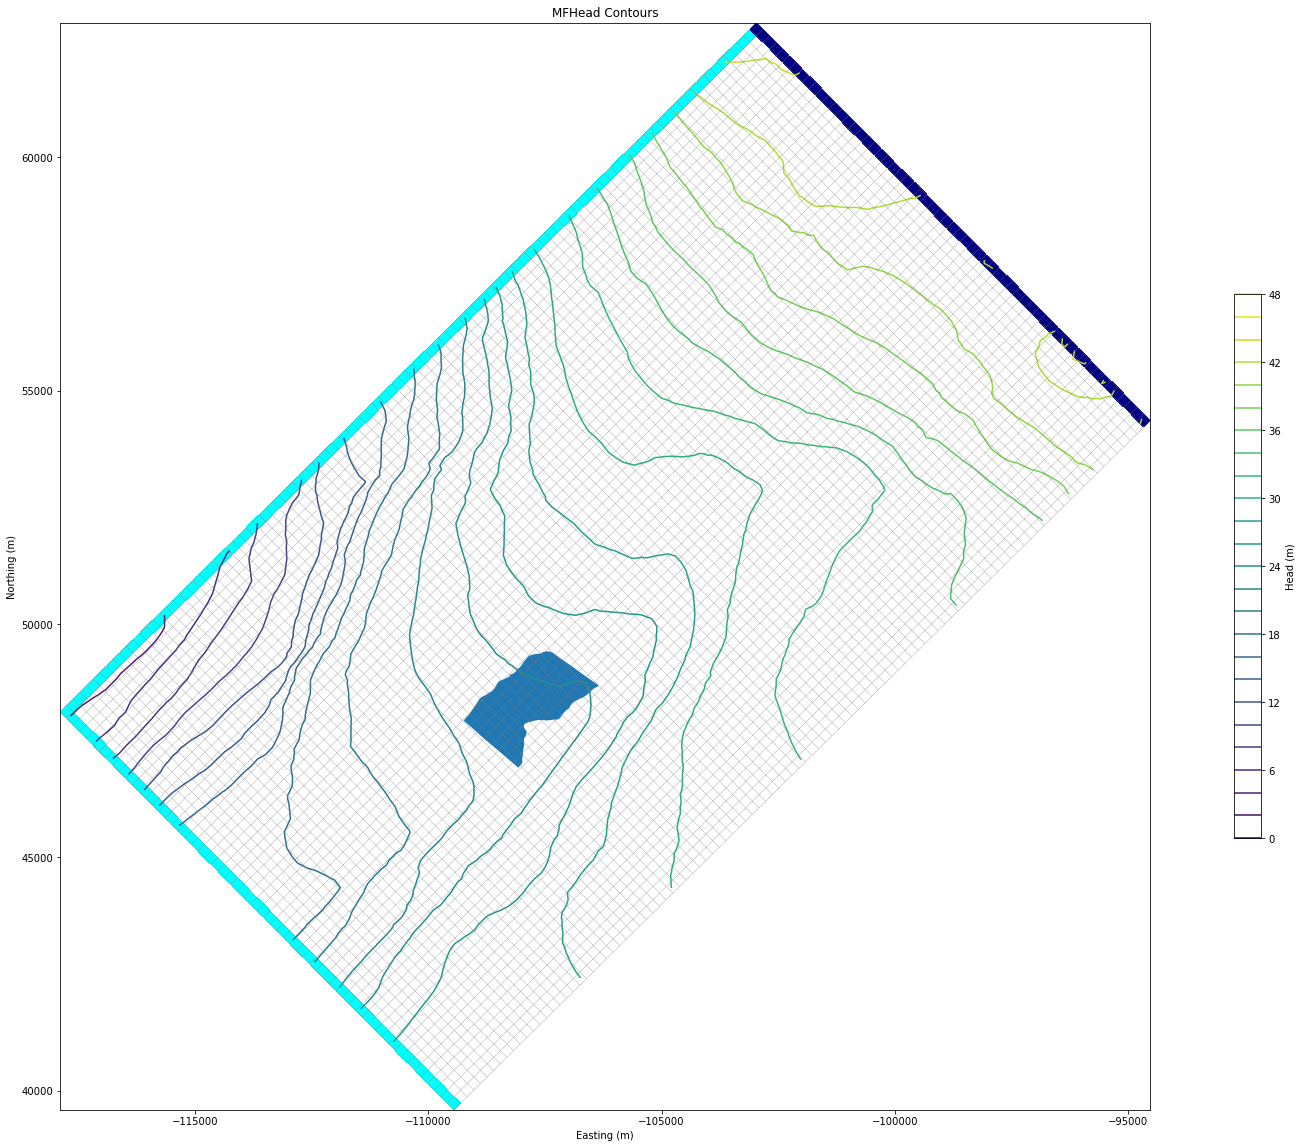

In [194]:
##Extract Heads to Array
hdobj = flopy.utils.HeadFile(model_ws + '/MF.hds')
#spd_stp = hdobj.get_kstpkper()
# for i in np.arange(0,len(spd_stp)):
plot_head(hdobj, 'MF')
#spd_stp
plt.savefig('Head_Contours')

In [139]:
hdobj = flopy.utils.HeadFile(model_ws + '/MF.hds')
#hdobj.list_records()
rec = hdobj.get_data()
len(hdobj)

TypeError: object of type 'HeadFile' has no len()